In [28]:
using DifferentialEquations, Optim, Plots, DataFrames, LinearAlgebra, CSV, Tables, Statistics, MuladdMacro, thyrosimIM

### Data

##### Sample Data

In [29]:
simple_patient = [1162180953, 1418877984, 1989446021, 2067437355, 958996582, 108829968, 1874605543, 1470855648, 1536196156, 1559267822, 1788553167, 1290407382];

In [30]:
# Import sample data
# sample_IM = DataFrame(CSV.File("C:/Users/Aidan/Documents/GitHub/BioCyb/thyrosimIM/data/DDR_initials.csv")); # DDR Hashimoto Steady-State
# labs_df = sample_IM
# dose_df = DataFrame(CSV.File("C:/Users/Aidan/Documents/GitHub/BioCyb/thyrosimIM/data/DDR_meds.csv"))
# sample_IM.t = 12 * sample_IM.t;
# sample_patient = [labs_df, dose_df];

##### Import Patient Data
Both dose and labs must be in days

In [31]:
function normalize_time(labs_df, dose_df)
    t_0 = min(minimum(labs_df.t), minimum(dose_df.t))
    labs_df.t = (labs_df.t .- t_0).*24
    dose_df.t = (dose_df.t .- t_0).*24
    patient_data = (labs_df, dose_df)
    return patient_data
end

function import_patient(patient_ID)
    data_dir = "C:/Users/Aidan/Documents/GitHub/BioCyb/thyrosimIM/data/Parsed_data/"
    info_path = data_dir * "patient-$patient_ID.txt"
    labs_path = data_dir * "patient-$patient_ID.csv"
    dose_path = data_dir * "patient_meds-$patient_ID.csv"
    labs_df = DataFrame(CSV.File(labs_path))
    dose_df = DataFrame(CSV.File(dose_path))

    patient_data = normalize_time(labs_df, dose_df)
    return patient_data
end

import_patient (generic function with 1 method)

### _Important_

`dose_df` must be defined explicitly in global scope so that callback is able to access medications. 

In [32]:
ideal_patients = [1,7]
patient = import_patient(simple_patient[1])
labs_df = patient[1]
dose_df = patient[2];

##### Patient Plotting

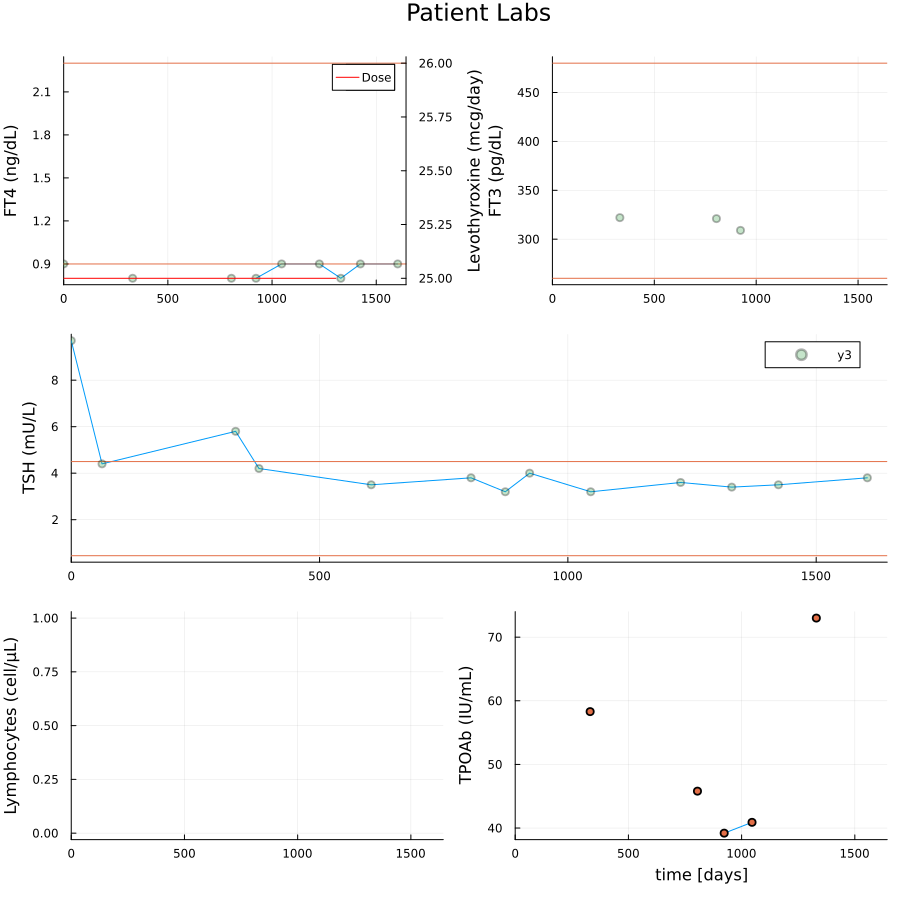

In [33]:
plot_patient(patient)

### Parameters

In [1]:
# Placeholder until some way to pass fixed, free parameters separatley is implemented
function fixed_parameters()

    # dial=[1.0; 0.88; 1.0; 0.88]
    p = zeros(Float64, 82)
    p[1] = 0.0027785399344 #S4
    p[2] = 8               #tau
    p[3] = 0.868           #k12
    p[4] = 0.108           #k13
    p[5] = 584             #k31free
    p[6] = 1503            #k21free
    p[7] = 0.000289        #A
    p[8] = 0.000214        #B
    p[9] = 0.000128        #C
    p[10] = -8.83*10^-6    #D
    p[11] = 0.88           #k4absorb
    p[12] = 0.0189         #k02
    p[13] = 0.012101809339 #VmaxD1fast
    p[14] = 2.85           #KmD1fast
    p[15] = 6.63*10^-4     #VmaxD1slow
    p[16] = 95             #KmD1slow
    p[17] = 0.00074619     #VmaxD2slow
    p[18] = 0.075          #KmD2slow
    p[19] = 3.3572*10^-4   #S3
    p[20] = 5.37           #k45
    p[21] = 0.0689         #k46
    p[22] = 127            #k64free
    p[23] = 2043           #k54free
    p[24] = 0.00395        #a
    p[25] = 0.00185        #b
    p[26] = 0.00061        #c
    p[27] = -0.000505      #d
    p[28] = 0.88           #k3absorb
    p[29] = 0.184972339613 #k05
    p[30] = 450            #Bzero
    p[31] = 219.7085301388 #Azero
    p[32] = 0              #Amax
    p[33] = -3.71          #phi
    p[34] = 0.53           #kdegTSH-HYPO
    p[35] = 0.226          #VmaxTSH
    p[36] = 23             #K50TSH
    p[37] = 0.058786935033 #k3
    p[38] = 0.29           #T4P-EU
    p[39] = 0.006          #T3P-EU
    p[40] = 0.037          #KdegT3B
    p[41] = 0.0034         #KLAG-HYPO
    p[42] = 5              #KLAG
    p[43] = 1.3            #k4dissolve
    p[44] = 0.12           #k4excrete
    p[45] = 1.78           #k3dissolve
    p[46] = 0.12           #k3excrete
    p[47] = 3.2            #Vp
    p[48] = 5.2            #VTSH
    p[49] = 3.001011022378 #K_circ
    p[50] = 3.094711690204 #K_SR_tsh
    p[51] = 5.674773816316 #n_hillcirc
    p[52] = 6.290803221796 #m_hillTSH
    p[53] = 8.498343729591 #K_f4 for f4
    p[54] = 14.36664496926 #l_hillf3
    # p[55] = 0.0 # T4 oral dose
    # p[56] = 0.0 # T3 oral dose
    p[57] = 1.0 # dial[1] # controls T4 secretion rate
    p[58] = 0.88 # dial[2] # controls T4 excretion rate
    p[59] = 1.0 # dial[3] # controls T3 secretion rate
    p[60] = 0.88 # dial[4] # controls T3 excretion rate
    p[61] = 5.003761571969437   # σT4
    p[62] = 0.11122955089297369 # σT3
    p[63] = 0.4                 # σTSH
    p[64] = 0.1                 # σFT4
    p[65] = 21.82854404275587 # maleBMI_ref
    p[66] = 22.99050845201536 # femaleBMI_ref
    p[67] = 1.0 #Vtsh_scale
    p[69] = 1.0 # PV_ratio
    p[70] = -1.0 # PV
    p[71] = 1.0 # PV_allometric_exp
    p[72] = 1.0 # fat_free
    p[73] = 0.0 # fat
    p[74] = 1.0 # slow_scale
    p[75] = 1.0 # fast_scale
    p[76] = 0.75 # male_allometric
    p[77] = 0.75 # female_allometric
    p[78] = 1.7608716659237555 # male_ref_height
    p[79] = 1.6696106891941103 # female_ref_height
    p[80] = 1.0499391485135692 # male_clearace
    p[81] = 0.0 # T4 infusion
    p[82] = 0.0 # T3 infusion

    return p
end

function ics(;patient=(), optimal_path::String="")
    ic    = zeros(Float64, 25)
    ic[1] = 0.322114215761171 #T4dot
    ic[2] = 0.201296960359917 #T4fast
    ic[3] = 0.638967411907560 #T4slow
    ic[4] = 0.00663104034826483 #T3pdot
    ic[5] = 0.0112595761822961 #T3fast
    ic[6] = 0.0652960640300348 #T3slow
    ic[7] = 1.78829584764370 #TSHp
    ic[8] = 7.05727560072869 #T3B
    ic[9] = 7.05714474742141 #T3B_lag
    ic[10] = 0 #T4PILLdot
    ic[11] = 0 #T4GUTdot
    ic[12] = 0 #T3PILLdot
    ic[13] = 0 #T3GUTdot
    ic[14] = 3.34289716182018 #delay1
    ic[15] = 3.69277248068433 #delay2
    ic[16] = 3.87942133769244 #delay3
    ic[17] = 3.90061903207543 #delay4
    ic[18] = 3.77875734283571 #delay5
    ic[19] = 3.55364471589659 #delay6
    #immune
    ic[20] = 320 # B-cells
    ic[21] = 80 # Plasma cells 
    ic[22] = 680 # CD4+ cells
    ic[23] = 5e9 # Cytokines
    ic[24] = 5 # FTS
    ic[25] = 240 # Antibodies

    if !isempty(patient)
        first_labs = argmin(patient[1].t)
        patient_values = Vector(patient[1][first_labs, 3:7])
        for (i, value) in enumerate([1,4,7,(20,21,22),25])
            if value isa Int
                !ismissing(patient_values[i]) && (ic[value] = patient_values[i])
            else
                for (subi, subval) in enumerate(value)
                    lymphocyte_ratios = [0.2,0.05,0.75]
                    !ismissing(patient_values[i]) && (ic[subval] = lymphocyte_ratios[subi]*patient_values[i])
                end
            end
        end
    elseif !isempty(optimal_path)
        values = Vector{Float64}()
        file = open(optimal_path, "r")
        try
            file_content = read(file, String)
            value_strings = split(file_content, ",")
            for val_str in value_strings
                push!(values, parse(Float64, val_str))
            end
        finally
            close(file)
        end
        ic = values
    end

    return ic
end


function initialize_free()
    p = zeros(23)
    # Immune Parameters
    p[1] = 3e-4 # 83 B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1e-2 # 84 Plasma cell transformation rate
    p[3] = 8.05e-1 # 85 CD4+ activation rate
    p[4] = 51.84e5 # 86 Cytokine production rate
    p[5] = 1e5 # 87 relative growth rate of FTS
    p[6] = 2e2 # 88 combined antibody production rate
    p[7] = 5e-1 # 89 B-cell death rate
    p[8] = 1.0e-2 # 90 Plasma cell death rate
    p[9] = 2.41e-1 # 91 CD4+ cell death rate
    p[10] = 1.189e3  # 92 Cytokine degredation rate
    p[11] = 1e-2 # 93 Functional thyroid destruction rate
    p[12] = 5.74e1 # 94 Blood Ab degredation rate
    p[13] = 18e5 # 95 B-cell cytokine binding activation threshold
    p[14] = 2e6 # 96 CD4+ T-cell cytokine binding activation threshold
    p[15] = 1e5 # 97 FT4 B-cell stimulation NOTE: NEED TO FIT and CHANGE - try changing this a lot
    p[16] = 1e3 # 98 FT4 T-cell stimulation
    p[17] = 9.1e-4 # 99 CD4+ T-cell inhibition rate
    p[18] = 13.5 # 100 Euthyroid FTS

    # Fitting Variance
    p[19] = 1 # 101 T4 Variance
    p[20] = 1 # 102 T3 Variance
    p[21] = 1 # 103 TSH Variance
    p[22] = 1 # 104 Lymphocyte Variance
    p[23] = 1 # 105 Antibody Variance

    return p
end

function initialize_all(;optimal::Bool=false, optimal_path::String="")
    p = zeros(105)
    p[1:82] = fixed_parameters()
    
    if optimal
        import_parameters(optimal_path)
    else
        p[83:105] = initialize_free()
    end

    return p
end


function meha_free()

    # alpha and beta (p[17,18]) should be related as p[17] = 1/p[18]... need to take out and renumber parameters eventually 
    p = zeros(30)
    p[1] = 3e-3 # B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1e-2 # Plasma cell transformation rate
    p[3] = 1.05e-5 # CD4+ activation rate
    p[4] = 51.84e5 # Cytokine production rate
    p[5] = 1e6 # relative growth rate of FTS
    p[6] = 1e-6 # combined antibody production rate
    p[7] = 2e-6 # B-cell death rate
    p[8] = 4.0e-2 # Plasma cell death rate
    p[9] = 8.91e-1 # CD4+ cell death rate
    p[10] = .189  # Cytokine degredation rate
    p[11] = 1e-2 # Functional thyroid destruction rate
    p[12] = 1.74e-3 # Blood Ab degredation rate
    p[13] = 18e5 # B-cell cytokine binding activation threshold
    p[14] = 2e6 # CD4+ T-cell cytokine binding activation threshold
    p[15] = 1e3 # NOTE: NOT USED IN THE FUNCTION!!!
    p[16] = 9.1e-4 # CD4+ T-cell stimulation rate
    p[17] = 1 #alpha
    p[18] = 1 #beta
    p[19] = 0.068 #k1
    p[20] = 0.063 #k2
    p[21] = 1 #n

    # Fitting Variance
    p[22] = 1 # 100 T4 Variance
    p[23] = 1 # 101 T3 Variance
    p[24] = 1 # 102 TSH Variance
    p[25] = 1 # 103 Lymphocytes
    p[29] = 1 # 107 TPOAb Variance
    p[30] = 1 # 108 TGAb Variance

    return p
end

function meha_ics()

    ic    = zeros(Float64, 25)
    ic[1] = 0.322114215761171 #T4dot
    ic[2] = 0.201296960359917 #T4fast
    ic[3] = 0.638967411907560 #T4slow
    ic[4] = 0.00663104034826483 #T3pdot
    ic[5] = 0.0112595761822961 #T3fast
    ic[6] = 0.0652960640300348 #T3slow
    ic[7] = 1.78829584764370 #TSHp
    ic[8] = 7.05727560072869 #T3B
    ic[9] = 7.05714474742141 #T3B_lag
    ic[10] = 0 #T4PILLdot
    ic[11] = 0 #T4GUTdot
    ic[12] = 0 #T3PILLdot
    ic[13] = 0 #T3GUTdot
    ic[14] = 3.34289716182018 #delay1
    ic[15] = 3.69277248068433 #delay2
    ic[16] = 3.87942133769244 #delay3
    ic[17] = 3.90061903207543 #delay4
    ic[18] = 3.77875734283571 #delay5
    ic[19] = 3.55364471589659 #delay6

    #immune
    ic[20] = 100 # B-cells
    ic[21] = 20 # Plasma cells 
    ic[22] = 100 # CD4+ cells
    ic[23] = 5e9 # Cytokines
    ic[24] = 3.122e8 #TPOAb
    ic[25] = 1.43e8 #TGAb

    return ic
end

meha_ics (generic function with 1 method)

In [8]:
using DelimitedFiles

parameters = initialize_all()
initial_conditions = ics()
# Specify the file path
file_path = "thyrosimIM_params.txt"
ic_path = "ICs.txt"

# Convert the vector to a formatted string
formatted_string = "[$(join(parameters, ','))]"
formatted_ICs = "[$(join(initial_conditions, ','))]"

# Write the formatted string to a text file
open(file_path, "w") do file
    println(file, formatted_string)
end
open(ic_path, "w") do file
    println(file, formatted_ICs)
end

In [35]:
function import_parameters(param_path)
    # Initialize an empty vector to store the values
    values = Vector{Float64}()

    # Open the file in read mode
    file = open(param_path, "r")

    try
        # Read the entire file content as a string
        file_content = read(file, String)

        # Split the content by spaces to obtain individual values
        value_strings = split(file_content, ",")

        # Convert each value to a Float64 and append to the vector
        for val_str in value_strings
            push!(values, parse(Float64, val_str))
        end

    finally
        # Close the file when done reading
        close(file)
    end

    return values
end;

### Fitting Functions

In [50]:
# Run simulation for certain amount of days (hopefully to steady state)
function find_patient_ic!(ic, p, days; model = thyrosimIM!)
    tspan = (0.0, 24.0 * days)
    prob = ODEProblem(model, ic, tspan, p)
    sol = solve(prob)
    ic .= sol[end]
end

# Read doseages from lookup table (dose_df) MUST be defined prior to fitting
function add_dose!(integrator)
    try
        integrator.u[10] += dose_df.Levothyroxine[findfirst(==(integrator.t), dose_df.t)]/777
    catch
        integrator.u[10] += 0
    end
end

dose_times = dose_df.t
dose_callback = PeriodicCallback(dose_times, 24);

In [51]:
import NaNMath # handles log of negative number that can occur due to adaptive ODE solvers


function combine_params(free_parameters::Vector, fixed_parameters::Vector, free_indicies::Vector)
    #print("Free Parameters: $(length(free_parameters)), Fixed Parameters: $(length(fixed_parameters)), Free Indices: $(length(free_indicies)).")
    if isempty(free_indicies) #assume fixed... + free... is correctly ordered parameter Vector
        p = [fixed_parameters; free_parameters] 
    else # we must have free_parameters in same order as free_indicies. fixed_parameters must be in ascending index order
        p = zeros(length(free_parameters) + length(fixed_parameters))
        fixed_indicies = setdiff(1:size(p, 1), free_indicies)
        for i in eachindex(p)
            if i in(free_indicies)
                p[i] = free_parameters[findall(x -> x == i, free_indicies)[1]] 
            else   
                p[i] = fixed_parameters[findall(x -> x == i, fixed_indicies)[1]] 
            end
        end
    end
    return p
end

function log_lsq_loss(sol, time, data, ID, plot_no)
    data_columns = names(data)[3:7] # this selects T4,T3, TSH, Lymphocytes, Ab
    sol_indicies = [[1],[4],[7],[20,21,22],[25]] # indicies for T4, T3, TSH, Lymphocytes, Ab
    loss_vector = [0.0,0.0,0.0,0.0,0.0] # loss for T4,T3, TSH, Lymphocytes, Ab respectivley
    for (i, column) in enumerate(data_columns)
        #out = true
        if any(!ismissing, data[!, column])
            μ = mean(skipmissing(data[!, column]))
            for (j, t) in enumerate(time)
                datapoint = data[!, column][j]
                if ismissing(datapoint)
                    loss_vector[i] = loss_vector[i]
                else
                    predicted = 0
                    if column == "T4"
                        predicted = FT4(sol(t)[sol_indicies[i]])[1]
                        #out && println("FT4 at t = 0: $(predicted). Actual: $(datapoint)"); out = false
                        loss_vector[i]+= ((log10(predicted^2) - log10(datapoint^2))/log10(μ^2))^2
                    elseif column == "T3"
                        predicted = FT3(sol(t)[sol_indicies[i]])[1]
                        #out && println("FT3 at t = 0: $(predicted). Actual: $(datapoint)"); out = false
                        loss_vector[i]+= ((log10(predicted^2) - log10(datapoint^2))/log10(μ^2))^2
                    else
                        for state_variable in sol_indicies[i]
                            predicted += sol(t)[state_variable][1]
                        end
                        #out && println("Lymphocytes at t = 0: $(predicted). Actual: $(datapoint)"); out = false
                        loss_vector[i] += ((log10(predicted^2) - log10(datapoint^2))/log10(μ^2))^2
                    end
                end
            end
        else
            loss_vector[i] += 0
        end
    end

    global plot_no
    global ID
    if mod(plot_no, 100) == 0 
        optim_plotter(sol, data, title = "Optimization_$(ID)_$(plot_no)", save_to_file = true, plot_no=plot_no, ID=ID)
        save_ic(sol)
        # 
        # save_opt_conditions(fitting_trial, "090323")
    end
    plot_no += 1
    
    global GLOBAL_LOSS
    GLOBAL_LOSS = vcat(GLOBAL_LOSS, loss_vector')
    
    return loss_vector
end

function save_ic(sol)
    ics_vector = sol.u[1]
    filestring = ("optimal_ics.txt")
    file = open(filestring, "w")
    write(file, join(ics_vector, ",")) 
    close(file)
end

function bounded_log_lsq_loss(sol, time, data, plot_no)
    data_columns = names(data)[3:7] # this selects T4,T3, TSH, Lymphocytes, Ab
    sol_indicies = [[1],[4],[7],[20,21,22],[25]] # indicies for T4, T3, TSH, Lymphocytes, Ab
    loss_vector = [0.0,0.0,0.0,0.0,0.0] # loss for T4,T3, TSH, Lymphocytes, Ab respectivley
    bounds = [[0.0,40.0],[0.0,3.0e3],[0.0,300.0],[100.0,3000.0],[0, 2.0e3]]
    for (i, column) in enumerate(data_columns)
        warn = true
        if any(!ismissing, data[!, column])
            μ = mean(skipmissing(data[!, column]))
            for (j, t) in enumerate(time)
                datapoint = data[!, column][j]
                if ismissing(datapoint)
                    loss_vector[i] = loss_vector[i]
                else
                    predicted = 0
                    if column == "T4"
                        predicted = FT4(sol(t)[sol_indicies[i]])
                    elseif column == "T3"
                        predicted = FT3(sol(t)[sol_indicies[i]])
                    elseif column == "Ab"
                        predicted = TPOConvert(sol(t)[sol_indicies[i]])
                    else
                        for state_variable in sol_indicies[i]
                            predicted += sol(t)[state_variable]
                        end
                    end
                    # if predicted out of bounds, assign large penalty. Else assign log_sql_loss
                    weighted_loss = ((log10(predicted^2) - log10(datapoint^2))/log10(μ^2))^2
                    (predicted < bounds[i][1] || predicted > bounds[i][2] ) : (loss_vector[i] += 1e2*weighted_loss) : (loss_vector[i] += weighted_loss)
                    if warn
                        predicted < bounds[i][1]  && println("$(data_columns[i]) < 0")
                        predicted > bounds[i][2] && println("$(data_columns[i]) > $(bounds[i][2])")
                        warn = false
                    end
                end
            end
        else
            loss_vector[i] += 0
        end
    end
    
    global plot_no
    #if mod(plot_no, 10) == 0 
    optim_plotter(sol, data, title = "Optimization progress frame $(plot_no)", save_to_file = true, plot_no=plot_no)
    #end
    plot_no += 1

    
    global GLOBAL_LOSS
    GLOBAL_LOSS = vcat(GLOBAL_LOSS, loss_vector')
    
    return loss_vector 
end

function objective(
    free_parameters::Vector,
    fixed_parameters::Vector,
    free_index::Vector,
    ics::Vector,
    lb::Vector,
    ub::Vector,
    data::DataFrame;
    model=thyrosimIM!,
    loss_function::Function=neg_logl,
    solver=Rosenbrock23(),
    use_callback::Bool = false,
    ID::Int = 1,
    solver_opts::Any = [])

    # Bound solution space - needs to be replaced with Optim native options
    for (i, parameter) in enumerate(free_parameters[1:end-5])
        if !(lb[i] ≤ parameter ≤ ub[i])
            # println("Parameter $i with value $parameter was out of bounds $(lb[i]) -- $(ub[i]).")
            return 10e6
        end
    end

    # assign t from data, initialize thyrosim problem and compute solution
    t = data.t; tspan = (t[1], t[end])

    sol = simulate(model, ics, tspan, free_parameters, fixed_parameters, free_index, warmup = true, warmup_period = 2, use_callback = use_callback)

    # For now, we are fitting 5 state variables (1,4,7, 20:22, 25). Thus, last 6 parameters must be
    # for MLE: solver_opts = corresponding variance of the state variables for MLE, can make variable SV number in future
    # for bounded_log_lsq_loss: solver_opts = bounds for each SV
    loss = loss_function(sol, t, data, ID, solver_opts)
    
    total_loss = sum(loss) + 100 # add 100 to ensure model runs for entire time

    return total_loss
end

"""
**Required Args**
 - `params`: A vector containing all parameters used in the ODE Model
 - `free_index`: A vector of integer values specifying the indices of free parameters to be fit by the optimization routine. One parameter for each state variable variance **MUST** be provided at the end of the parameter list.
 - `ics`: Initial state variable values
 - `lb` and `ub`: Vectors with lower and upper bounds for free parameters (must be same length)
 - `data`: Dataframe with patient lab values

 ### _Note_: a Dataframe named dose_df with patient LT4 dosing MUST be defined or the function will throw an error
 
 **Keyword Args**
 - `model`: defaults to `thyrosimIM!`. Can provide alternate model here
 - `loss_function`: How loss is calculated from data (WLS, MLE, custom function....)
 - `use_callback`: specify true if patient has medication values. These must be provided as a dataframe named `dose_df`
 - `optimization_routine`: Nelder-Mead(), Newton(), LBFGS(), etc.. See [Optim.jl Documentation](https://docs.sciml.ai/Optimization/stable/optimization_packages/optim/) for available search routines
 - `iterations`: maximum iterations to run for. Defaults to 100k iterations
 - `time_limit`: maximum time (in seconds) to run parameter search. Note this applies only to optim and does not account for time taken to actually solve ODE problem and calculate loss. Usually takes about double the time you enter here to complete the search if maximum iterations is not reached
 """
function fit_all(
    params::Vector,
    free_index::Vector{Int},
    ics::Vector,
    lb::Vector,
    ub::Vector,
    data::DataFrame;
    model=thyrosimIM!,
    loss_function::Function=lsq_loss,
    use_callback::Bool = false,
    optimization_routine = NelderMead(),
    iterations::Int = 100000,
    time_limit::Number = 200.0,
    ID::Int = 1,
    solver_opts::Any = [])

    # set fixed parameter indexing and split params vector into free and fixed
    fixed_index = Int.(setdiff(collect(1:length(params)), free_index))
    free_params_initial = params[free_index]
    fixed_params = params[fixed_index]

    # print("Free Parameters: $(params[free_index]). Fixed Parameters: $(params[fixed_index])")
    global plot_no
    plot_no = 1

    print("Fitting...")
    solution = optimize(free_params -> objective(free_params, fixed_params, free_index, ics, lb, ub, data, 
        model=model, loss_function=loss_function, use_callback=use_callback, ID=ID, solver_opts=plot_no), 
        free_params_initial, optimization_routine, 
        Optim.Options(time_limit = time_limit, iterations = iterations, g_tol=1e-15,
        show_trace = false, allow_f_increases=true))
    return solution
end

fit_all

In [52]:
# Convert from internal to plotting/fitting units
"""
Converts TT4 (μmol) to FT4 (μg/dL) using Thyrosim's internal 4th order polynomial
"""
function FT4(TT4::Float64)
    return (0.000289 + (0.000214 * TT4) + (0.000128 * TT4^2) - (8.83e-6 * TT4^3)) * TT4 * 24281.25 * .45  # Convert from TT4 to FT4 then from μmol FT4 to μg/dL FT4 via scaling factor 
end

"""
Converts TT3 (μmol) to FT3 (μmol) using Thyrosim's internal 4th order polynomial
"""
function FT3(TT3::Float64)
    return (0.00395 + (0.00185 * TT3) + (0.000610 * TT3^2) - (-0.000505 * TT3^3)) * TT3 * 2830400.35 * 5
end


FT3

In [53]:
function simulate(model, ic, tspan, free_parameters, fixed_parameters, free_indices::Vector; use_callback::Bool = false, solver = Rosenbrock23(), warmup::Bool=false, warmup_period::Int=30, print_ic::Bool=false)
    parameters = combine_params(free_parameters[1:end-5], fixed_parameters, free_indices[1:end-5])
    print_ic && print_ics!(ic)
    if warmup
        find_patient_ic!(ic, parameters, warmup_period)
    end
    if use_callback
        problem = ODEProblem(model, ic, tspan, parameters)
        sol = solve(problem, solver, callback = dose_callback, tstops = dose_times)
        return sol
    else
        problem = ODEProblem(model, ic, tspan, parameters)
        sol = solve(problem, solver)
        return sol
    end
end 

simulate (generic function with 1 method)

In [54]:
all_params = initialize_all()
free_params = initialize_free()
initial_conditions = ics(optimal_path="optimal_ics.txt")
fixed_params = fixed_parameters()
meha_params = meha_free()
meha_initial_conditions = meha_ics();

In [55]:
function print_ics!(intial_conditions)
    indicies = [1,4,7,20,21,22,25]
    svs = initial_conditions[indicies]
    println("FT4 = $(FT4(svs[1])),\t base = $(svs[1])")
    println("FT3 = $(FT3(svs[2])),\t base = $(svs[2])")
    println("TSH = $(svs[3]),\t base = $(svs[3])")
    println("Lym = $(sum(svs[4:6])),\t base = $(sum(svs[4:6]))")
    println("TPOAb = $(svs[7]),\t base = $(svs[7])")

    return nothing
end

print_ics!(initial_conditions)

FT4 = 11.50846352132026,	 base = 1.3415159506138936
FT3 = 1214.0999250736197,	 base = 0.02150090452894211
TSH = 2.6474502208706907,	 base = 2.6474502208706907
Lym = 2034.0958183740247,	 base = 2034.0958183740247
TPOAb = 1688.6612131214288,	 base = 1688.6612131214288


### Test Simulation

In [56]:
function simplot(sol; alt_model::Bool = false, automargins::Bool = true, title = "Unit Test 1")
    
    p = sol.prob.p 
    t4lim, t3lim, tshlim = 140, 4, 10
    T4 = FT4.(sol[1, :])
    T3 = FT3.(sol[4, :])
    T4T3Labels = ["FT4 (ng/dL)", "FT3 (pg/dL)"]
    T4T3Ranges = [[0.9, 2.3], [260, 480]]
    TSH = TSHfit.(sol[7, :])
    Bcell = sol[20, :]
    Pcell = sol[21, :]
    Tcell = sol[22, :]
    Lymphocytes = sol[20, :].+sol[21, :] .+ sol[22, :]
    TPOAb = (sol[25, :]) # convert to pM from molecules/mL
    alt_model && (TPOAb = (sol[24, :])) # convert to pM from molecules/mL
    alt_model && (TGAb = (sol[25, :]))

    xlim=(0,sol.t[end]/24) 
    if automargins
        t4lim = max(1.2*maximum(T4), T4T3Ranges[1][2]*1.1)
        t3lim = max(1.2*maximum(T3), T4T3Ranges[2][2]*1.1)
        tshlim = max(1.2maximum(TSH), 5.5)
        Llim = 1.2maximum(Lymphocytes)
        TPOlim = 1.2maximum(TPOAb)
        alt_model && (TGlim = 1.2maximum(TGAb))
    end

    p1 = plot(sol.t / 24.0, T4, ylim=(0, t4lim), xlim=xlim, label="", ylabel=T4T3Labels[1])
    p1 = hline!(T4T3Ranges[1], label= "")
    #p1 = scatter!(data.t./24, data.T4, alpha = 0.3, label= "")
    
    p2 = plot(sol.t / 24.0, T3, ylim=(0, t3lim), xlim=xlim, label="", ylabel=T4T3Labels[2])
    p2 = hline!(T4T3Ranges[2], label= "")
    #p2 = scatter!(data.t./24, data.T3, alpha = 0.3, label= "")
    
    p3 = plot(sol.t / 24.0, TSH, ylim=(0, tshlim), xlim=xlim, label="", ylabel="TSH (mU/L)")
    p3 = hline!([0.45, 4.5], label= "")
    #p3 = scatter!(data.t./24, data.TSH, alpha = 0.3, label= "")

    p4 = plot(sol.t / 24.0, Lymphocytes, ylabel="Lymphocytes (cell/mL)", ylim=(0,Llim), xlim=xlim, label="")
    #p4 = scatter!(data.t./24, data.Lymphocytes, alpha = 0.3, label= "")
    p4 = plot!(sol.t /24.0, Bcell, label = "B-Cells")
    p4 = plot!(sol.t /24.0, Tcell, label = "T-Cells")
    p4 = plot!(sol.t /24.0, Pcell, label = "Plasma Cells")

    p5 = plot(sol.t / 24.0, TPOAb, ylabel="TPOAb (IU/mL)", xlabel="time [days]", ylim=(0,TPOlim), xlim=xlim, label="")
    #p5 = scatter!(data.t./24, data.Ab, alpha = 0.3, label= "")
    
    if alt_model
        p6 = plot(sol.t / 24.0, TGAb, ylabel="TGAb (IU/mL)", xlabel="time [days]", ylim=(0,TGlim), xlim=xlim, label="")
        l = @layout [a b ; c ; d e f]
        plot!(size=(900,900))
        p_main = plot!(p1, p2, p3, p4, p5, p6, layout=l)
    else
        # p6 = plot(dose_df.t / 24.0, dose_df.Levothyroxine, ylabel="Oral Levothyroxine (mcg/day)", xlabel = "time [days]", label="")
        l = @layout [a b ; c ; d e]
        plot!(size=(900,900))
        p_main = plot!(p1, p2, p3, p4, p5, layout=l)
    end
    

    p_main[:plot_title] = title
    plot(p_main)
end;

In [57]:
#test_sim = simulate(meha_model!, meha_initial_conditions, (0,2120), meha_params, fixed_params)
test_sim_base = simulate(thyrosimIM!, initial_conditions, (0,40000), free_params, fixed_params, [], use_callback = true, warmup=true, warmup_period=2);

MethodError: MethodError: objects of type Vector{Float64} are not callable
Use square brackets [] for indexing an Array.

In [45]:
test_p = simplot(test_sim_base, title="Model Test (With LT4 Dose)")

UndefVarError: UndefVarError: `test_sim_base` not defined

### Parameter Fitting

Note that free indices **MUST** be increasing order.

In [46]:
#1,11,19,28,31,34
free_indicies = Int.(vcat([1,11,19,31,34,50,57,58,59,60],collect(83:105))) #last 5 are variances for each of the state variables
# Parameter Bounds
lb = zeros(size(free_indicies)[1])
ub = 1e5*all_params[free_indicies]
initial_conditions = ics()
loss_function = log_lsq_loss;

Something is wrong with fitting due to dose callback... need to fix this to fit the non-dose patients

# FIT HERE

In [47]:
global ID
global GLOBAL_LOSS
ID = 1
GLOBAL_LOSS = [0.0 0.0 0.0 0.0 0.0;];

function optimize_patients!(patient_list, free_indicies; simtime::Real = 100.0)
    ID = 1

    # Loop through patients in vetted list, extract labs and meds
    for patient_ID in patient_list

        println("Patient $(patient_ID):")

        patient = import_patient(patient_ID)
        labs_df = patient[1]
        dose_df = patient[2]

        lb = zeros(size(free_indicies)[1])
        ub = 1e5*all_params[free_indicies]
        initial_conditions = ics()
        loss_function = log_lsq_loss;

        GLOBAL_LOSS = [0.0 0.0 0.0 0.0 0.0;];
        fit_patient = fit_all(initialize_all(optimal=false, optimal_path = "optimal_params_072723.txt"), free_indicies, initial_conditions, lb, ub, labs_df,
                        model=thyrosimIM!, loss_function=loss_function, use_callback=true, optimization_routine = NelderMead(), time_limit = simtime, ID=ID)
        
        println("Patient $(patient_ID) complete. Image ID: $(ID)")
        ID += 1
    end
    return nothing
end


optimize_patients! (generic function with 1 method)

In [48]:
optimize_patients!(simple_patient[ideal_patients], free_indicies, simtime = 500.0)

Patient 1162180953:


Fitting...

MethodError: MethodError: objects of type Vector{Float64} are not callable
Use square brackets [] for indexing an Array.

In [22]:
ID = 2
GLOBAL_LOSS = [0.0 0.0 0.0 0.0 0.0;];
fitting_trial = fit_all(initialize_all(optimal=false, optimal_path = "optimal_params_072723.txt"), free_indicies, initial_conditions, lb, ub, labs_df,
                        model=thyrosimIM!, loss_function=loss_function, use_callback=true, optimization_routine = NelderMead(), time_limit = 500.0)
# fitting_trial_meha = fit_all(meha_params, fixed_params, meha_initial_conditions, lb, ub, sample_IM, model=meha_model!, loss_function=loss_function,
#    use_callback=true, optimization_routine = NelderMead(), time_limit=100.0)

Fitting...

MethodError: MethodError: objects of type Vector{Float64} are not callable
Use square brackets [] for indexing an Array.

In [23]:
ticks = length(fitting_trial.minimizer[1:end-5])
bar(abs.(fitting_trial.minimizer[1:end-5] - initialize_all(optimal=false, optimal_path="")[free_indicies[1:end-5]]), title="Results, 10x optimization time", xticks = (collect(1:ticks), collect(1:ticks)),
    label="", ylabel="|Δp|", xlabel="Parameter No.")
#scatter(abs.(fitting_trial_meha.minimizer-meha_params))

UndefVarError: UndefVarError: `fitting_trial` not defined

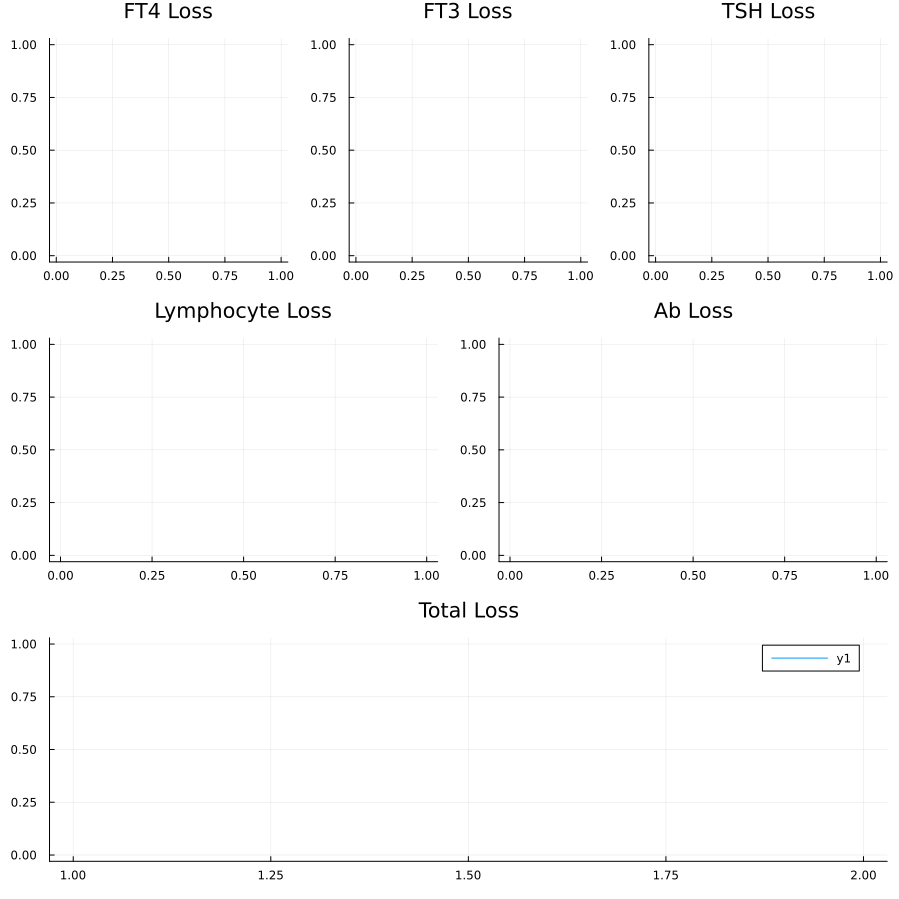

In [24]:
p1 = plot(GLOBAL_LOSS[2:end, 1], title="FT4 Loss", label = "")
p2 = plot(GLOBAL_LOSS[2:end, 2], title="FT3 Loss", label = "")
p3 = plot(GLOBAL_LOSS[2:end, 3], title="TSH Loss", label = "")
p4 = plot(GLOBAL_LOSS[2:end, 4], title="Lymphocyte Loss", label = "")
p5 = plot(GLOBAL_LOSS[2:end, 5], title="Ab Loss", label = "")
total_loss_plot = []
for row in eachrow(GLOBAL_LOSS)
    row_sum = sum(row)
    push!(total_loss_plot, row_sum)
end
p6 = plot(total_loss_plot, title="Total Loss")
plot!(size=(900,900))
plot(p1,p2,p3,p4,p5,p6, layout = @layout[a b c ; d e; f])

### Plots

In [23]:
# Compute unfit and fitted solutions for visualization
# tspan=(0.0,720.0*100)
# ic = ics() 
# title = "PLACEHOLDER"
# sol_meha = simulate(meha_model!, meha_initial_conditions, tspan, fitting_trial.minimizer, fixed_parameters(), use_callback = true, warmup=false);

In [ ]:
function save_opt_conditions(trial, date::String)
    parameter_vector = trial.minimizer
    filestring = ("optimal_params_" * date * ".txt")
    file = open(filestring, "w")
    write(file, join(parameter_vector, ",")) 
    close(file)
end

In [180]:
global ID = 1
tspan=(0.0,720.0*100)
optimal_params = import_parameters("optimal_params_082723.txt")
initial_conditions = ics(optimal_path="optimal_ics.txt")
title = "Female patient, mild Hashimoto's under LT4 management"
sol = simulate(thyrosimIM!, initial_conditions, tspan, fitting_trial.minimizer, fixed_parameters(), free_indicies, use_callback = true, warmup=true);
#sol_prefit = simulate(thyrosimIM!, initial_conditions, tspan, initialize_free(), fixed_parameters(), use_callback = false, warmup=false);

┌ Warning: dt(1.1368683772161603e-13) <= dtmin(1.1368683772161603e-13) at t=0.14147723108966342, and step error estimate = 47.91733061262107. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\kTUaf\src\integrator_interface.jl:599
┌ Warning: dt(1.4551915228366852e-11) <= dtmin(1.4551915228366852e-11) at t=0.0, and step error estimate = 30.582521777825576. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\kTUaf\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: specialized 2nd order "free" stiffness-aware interpolation
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.2929749183390879, 701675.1208083527, 5.431901806765795, 0.0031091820237965856, 71306.90539737912, 0.1505912871768319, -0.3211846829836837, 10.75768383895471, 10.852868211060294, 0.0  …  6.177214030023702, 6.136267783261099, 5.80443368585856, 5.275569037732293, 3.552739687137354e6, 2964.7467530658187, 68268.90516687559, 5.906925823219641e8, 9.041755226036743e-5, 5107.774437823492]

Maybe trying to do something model is not designed for... seems to fit the more "normal" data much better when dose is provided... Need to reevaluate

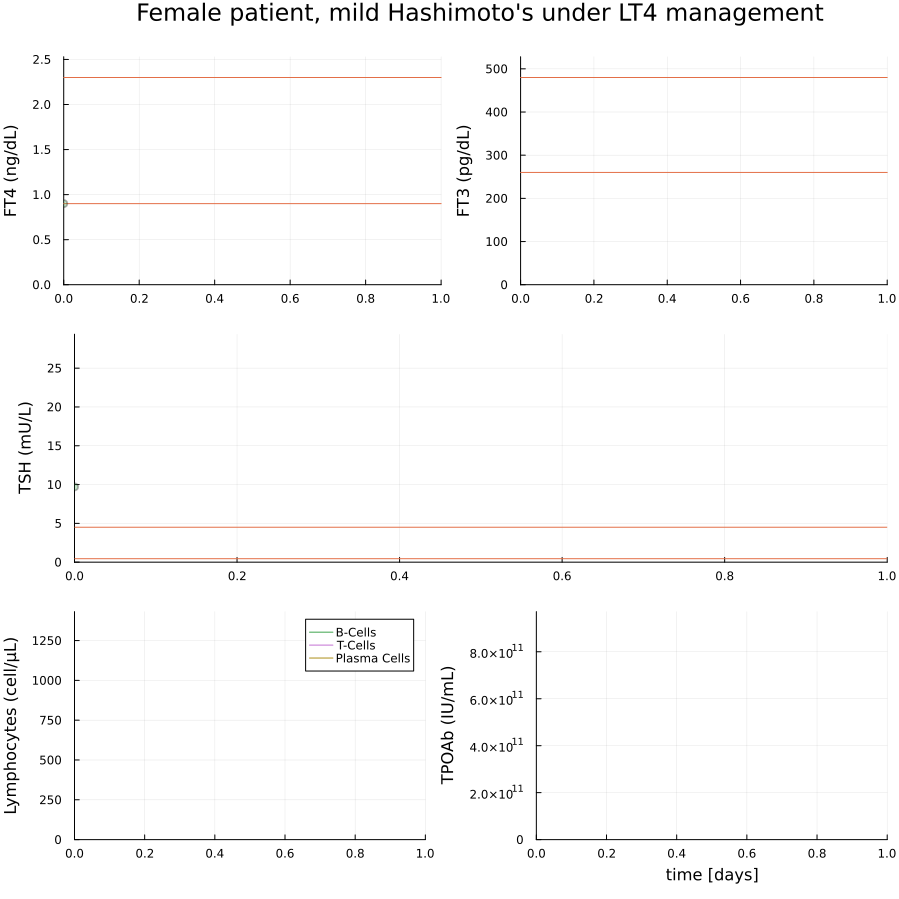

In [26]:
output_plotIM(sol, labs_df, title=title)

### Statistics

Estimated variances: [67.8250187039132, 1.6658705738334868e6, 1.965318983383396e6, 156280.48440051422, 1258.240845873117, 0.0014878757830387808, 26.329635614321987, 1.1203398191102267, 0.8473215060155002]

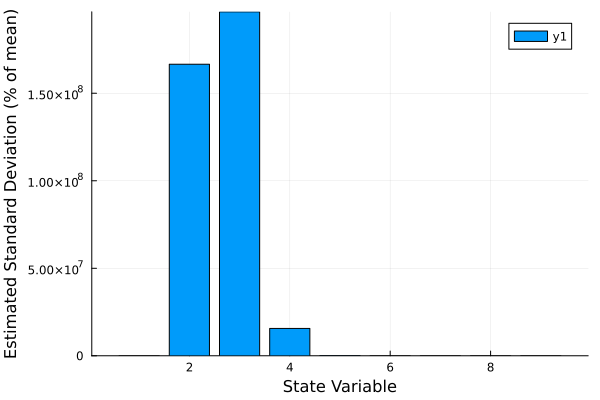

In [25]:
print("Estimated variances: ", fitting_trial.minimizer[18:26])
bar(100*fitting_trial.minimizer[18:26], xlabel = "State Variable", ylabel = "Estimated Standard Deviation (% of mean)")

In [26]:
function symlog(x::Number, base::Real = 10)
    if x == 0
        return 0.0
    else
        sign_x = sign(x)
        return sign_x * (log(abs(x)) / log(base) + 1)
    end
end

function normalize_matrix(matrix)
    D = Diagonal((sqrt.((diag(matrix)))))
    return inv(D)*matrix*inv(D)
end

function CV_estimation(
    free_parameters_guess::Vector,
    fixed_parameters::Vector,
    lb::Vector,
    ub::Vector,
    data::DataFrame;
    free_indicies::Vector=[],
    loss_function::Function=demeaned_neg_logl,
    variances::Vector=[])

    if isempty(free_indicies)
        fixed_indicies = collect(eachindex(fixed_parameters))
        free_indicies = setdiff(1:(size(fixed_indicies,1)+size(free_parameters_guess,1)), fixed_indicies)
    end

    optimal_sol = optimize(free_params -> objective(free_params, fixed_parameters,
        lb, ub, data, free_indicies=free_indicies, loss_function=lsq_loss),
        free_parameters_guess, Newton(), 
        Optim.Options(time_limit = 100.0, iterations = 0, g_tol=1e-5,
        show_trace = true, allow_f_increases=true, extended_trace=true))

    return optimal_sol
    #---------------------------------------------------#
    hessian = optimal_sol.trace[end].metadata["h(x)"]

    inv_hessian = try
        inv(hessian)
        return inv(hessian)
    catch problem
        if typeof(problem) == SingularException
            println("Inversion failed. Hessian is singular")
            return hessian
        else
            println(problem)
        end
    end
end

CV_estimation (generic function with 1 method)

In [27]:
# trace is not storing
CV_estimate = CV_estimation(MLE_trial.minimizer, fixed_params, lb, ub, sample_IM)

UndefVarError: UndefVarError: `MLE_trial` not defined

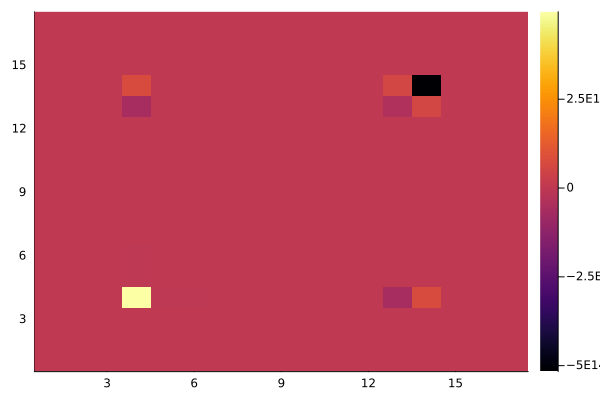

In [27]:
hess =  [5.086557062738764e7 -8.975713692101836e6 87721.39468827844 -0.0036138344026879496 -0.004169109330508855 0.0412036237380619 -1.4741641705452278e7 -1.415220801524967e6 -7.232587228557631e6 97680.68759578466 -3.4710551742016673e6 -1.2503822688478678e6 -1.881212748622513e-5 4.331103635188448e-6 3.717592557237433 7.230866191354491e6 602.5332329299303 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -8.975713692101836e6 2.3930191218268275e6 -20097.328623734415 0.0003923179193011434 -0.005702890229865123 0.00109862469334632 2.687370977333255e6 72092.9356058985 1.7620193666359484e6 -10598.562122166157 380617.8766720593 -146853.3437903449 3.3888286380636282e-6 -9.963711336140634e-7 -0.6646151759412562 -1.7616235209487602e6 -667.0786293996368 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 87721.39468827844 -20097.328623734415 750.672917753458 2.451237397663043e-5 0.00025870663443813716 -0.00010778125292582822 -23102.843414500356 -739.7527782619 -65890.18403806537 -661.2209930941463 -10650.256822027266 5136.194780535996 -4.774654266178749e-8 5.347429588044037e-8 0.0047717281398648665 65876.77626981586 30.51001457507274 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -0.0036138344026879496 0.0003923179193011434 2.451237397663043e-5 3.7740491955714115e-12 1.3289680219908628e-11 -1.1213298719172559e-11 0.0010989686844880939 0.0001725876146888288 -0.002218383926238594 -0.00010190227955872488 -5.469275126444685e-5 0.0004003325135622783 1.6022983112864047e-15 1.0962444990413473e-15 -3.214441567402506e-10 0.0022179522033147886 1.40538491564446e-6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -0.004169109330508855 -0.005702890229865123 0.00025870663443813716 1.3289680219908628e-11 2.993690506020081e-10 -2.69838687212555e-10 0.00550916791580176 0.0028076686020824825 -0.022471410432890544 -0.00035778696769167963 0.0034826519446613667 0.013925580041970174 -1.4079480183592112e-14 1.079784841512541e-14 -2.1837999003654676e-9 0.022467118268054004 2.5202451068291327e-5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0412036237380619 0.00109862469334632 -0.00010778125292582822 -1.1213298719172559e-11 -2.69838687212555e-10 3.5406467205514226e-10 -0.016286833474311473 -0.0043299566883707955 0.009761417935795439 0.0003025928484137311 -0.014160916558547974 -0.0176806906348114 -3.497897195888835e-14 6.641231465469611e-16 4.862481015239555e-9 -0.009759907459329314 -2.2600903165785402e-5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -1.4741641705452278e7 2.687370977333255e6 -23102.843414500356 0.0010989686844880939 0.00550916791580176 -0.016286833474311473 4.644851291599363e6 486567.7247246951 1.9976845998971164e6 -29662.864569440484 1.2673957838366851e6 735324.77851668 6.0310082873064206e-6 -1.2357312008009603e-6 -1.2003011311370468 -1.9972979332661182e6 178.05964930550965 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -1.415220801524967e6 72092.9356058985 -739.7527782619 0.0001725876146888288 0.0028076686020824825 -0.0043299566883707955 486567.7247246951 103078.4431964457 60341.5835371837 -4655.433536320925 223045.68682068586 224004.38903275877 6.492790297502281e-7 -4.731602464144343e-8 -0.13250625956622333 -60318.0732857883 210.64186184721967 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -7.232587228557631e6 1.7620193666359484e6 -65890.18403806537 -0.002218383926238594 -0.022471410432890544 0.009761417935795439 1.9976845998971164e6 60341.5835371837 5.970408869574159e6 59944.72408031672 975538.2786943838 -381839.63761492074 2.02773131710917e-6 -2.9548708244668235e-6 -0.3933077883961503 -5.974979799566187e6 -2695.85752319522 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 97680.68759578466 -10598.562122166157 -661.2209930941463 -0.00010190227955872488 -0.00035778696769167963 0.0003025928484137311 -29662.864569440484 -4655.433536320925 59944.72408031672 2752.6258061528206 1494.0702605694532 -10707.777468673885 -6.28709012690057e-8 -2.957558261059313e-8 0.00861091552552933 -59932.93724831939 -37.919711838344426 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -3.4710551742016673e6 380617.8766720593 -10650.256822027266 -5.469275126444685e-5 0.0034826519446613667 -0.014160916558547974 1.2673957838366851e6 223045.68682068586 975538.2786943838 1494.0702605694532 1.3028874911199808e6 822699.3145102784 1.5488955231148387e-6 -5.705556134287418e-7 -0.33215028836706023 -975311.4825131148 254.53371396703244 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -1.2503822688478678e6 -146853.3437903449 5136.194780535996 0.0004003325135622783 0.013925580041970174 -0.0176806906348114 735324.77851668 224004.38903275877 -381839.63761492074 -10707.777468673885 822699.3145102784 1.1612692013696134e6 9.76768816520486e-7 1.851410780218829e-7 -0.2164905428188198 381766.07608529925 1085.0214320034963 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; -1.881212748622513e-5 3.3888286380636282e-6 -4.774654266178749e-8 1.6022983112864047e-15 -1.4079480183592112e-14 -3.497897195888835e-14 6.0310082873064206e-6 6.492790297502281e-7 2.02773131710917e-6 -6.28709012690057e-8 1.5488955231148387e-6 9.76768816520486e-7 -4.151742171680194e-14 -2.739666586595205e-15 2.64883661556531e-11 -2.0483277471077734e-6 6.098953233676943e-10 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 4.331103635188448e-6 -9.963711336140634e-7 5.347429588044037e-8 1.0962444990413473e-15 1.079784841512541e-14 6.641231465469611e-16 -1.2357312008009603e-6 -4.731602464144343e-8 -2.9548708244668235e-6 -2.957558261059313e-8 -5.705556134287418e-7 1.851410780218829e-7 -2.739666586595205e-15 -2.2137375304422536e-15 2.9254659103647343e-13 2.9678318079693374e-6 1.2662622812313162e-9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 3.717592557237433 -0.6646151759412562 0.0047717281398648665 -3.214441567402506e-10 -2.1837999003654676e-9 4.862481015239555e-9 -1.2003011311370468 -0.13250625956622333 -0.3933077883961503 0.00861091552552933 -0.33215028836706023 -0.2164905428188198 2.64883661556531e-11 2.9254659103647343e-13 2.7190633271177427e-7 0.3931929275235566 -0.0001355286701648965 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 7.230866191354491e6 -1.7616235209487602e6 65876.77626981586 0.0022179522033147886 0.022467118268054004 -0.009759907459329314 -1.9972979332661182e6 -60318.0732857883 -5.974979799566187e6 -59932.93724831939 -975311.4825131148 381766.07608529925 -2.0483277471077734e-6 2.9678318079693374e-6 0.3931929275235566 5.9680625967901945e6 2695.3544289995575 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 602.5332329299303 -667.0786293996368 30.51001457507274 1.40538491564446e-6 2.5202451068291327e-5 -2.2600903165785402e-5 178.05964930550965 210.64186184721967 -2695.85752319522 -37.919711838344426 254.53371396703244 1085.0214320034963 6.098953233676943e-10 1.2662622812313162e-9 -0.0001355286701648965 2695.3544289995575 2.791544519044679 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
heatmap((inv(hess[1:17, 1:17])))

In [28]:
CV_df = DataFrame(CV_estimate, :auto)
no_parameters = 26

grid = 0.5:1:(no_parameters+0.5)
borders = collect(grid)
Estim_CV = inv(Hessian)
heatmap(symlog.(Estim_CV), c=:vik, title="Hessian")
xlabel!("Immune Parameters")
ylabel!("Immune Parameters")
xlims!((0.5,no_parameters+0.5)); ylims!((0.5,no_parameters+0.5))
xticks!(0:1:no_parameters); yticks!(0:1:no_parameters)
vline!(borders, c=:black, label=""); hline!(borders, c=:black, label="")

UndefVarError: UndefVarError: `CV_estimate` not defined

In [29]:
corr = normalize_matrix(abs.(CV_estimate))
heatmap(corr, c=:vik, title="Correlation Matrix")
xlabel!("Immune Parameters")
ylabel!("Immune Parameters")
xlims!((0.5,no_parameters+0.5)); ylims!((0.5,no_parameters+0.5))
xticks!(0:1:no_parameters); yticks!(0:1:no_parameters)
vline!(borders, c=:black, label=""); hline!(borders, c=:black, label="")

UndefVarError: UndefVarError: `CV_estimate` not defined